In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("heart_disease_prediction.csv")
df.sample(5)

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
52,65,0,3,140,417,1,2,157,0,0.8,1,1,3,Absence
106,51,1,3,100,222,0,0,143,1,1.2,2,0,3,Absence
260,58,0,3,120,340,0,0,172,0,0.0,1,0,3,Absence
41,62,0,4,124,209,0,0,163,0,0.0,1,0,3,Absence
31,66,1,4,160,228,0,2,138,0,2.3,1,0,6,Absence


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [4]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [5]:
df.shape

(270, 14)

In [6]:
df.dtypes

Age                          int64
Sex                          int64
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                 int64
EKG results                  int64
Max HR                       int64
Exercise angina              int64
ST depression              float64
Slope of ST                  int64
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [7]:
## Statistical Description
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270.0,NaN,NaN,NaN,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,NaN,NaN,NaN,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,NaN,NaN,NaN,3.174074,0.95009,1.0,3.0,3.0,4.0,4.0
BP,270.0,NaN,NaN,NaN,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,NaN,NaN,NaN,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,NaN,NaN,NaN,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,NaN,NaN,NaN,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,NaN,NaN,NaN,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,NaN,NaN,NaN,0.32963,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,NaN,NaN,NaN,1.05,1.14521,0.0,0.0,0.8,1.6,6.2


## Check Heart  Disease of patient over age 50

In [21]:
heart_disease_over_50 = df[(df['Age'] > 50) & 
                            (df['Heart Disease'] == 'Presence') & 
                            (df['Cholesterol'] >200) &
                            (df['BP'] > 140)]

heart_disease_over_50.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,Presence
33,59,1,4,170,326,0,2,140,1,3.4,3,0,7,Presence
37,59,1,1,160,273,0,2,125,0,0.0,1,0,3,Presence
48,66,1,2,160,246,0,0,120,1,0.0,2,3,6,Presence
49,65,0,4,150,225,0,2,114,0,1.0,2,3,7,Presence


## EDA

## Separate categorical and numerical values

In [8]:
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Heart Disease'], dtype='object')
Numerical Variables:
['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120', 'EKG results', 'Max HR', 'Exercise angina', 'ST depression', 'Slope of ST', 'Number of vessels fluro', 'Thallium']


Age
Skew : -0.16


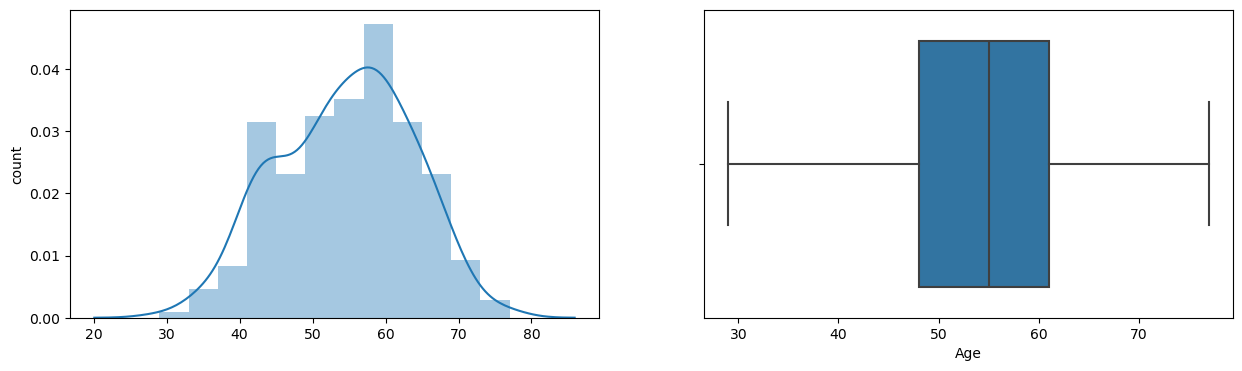

Sex
Skew : -0.77


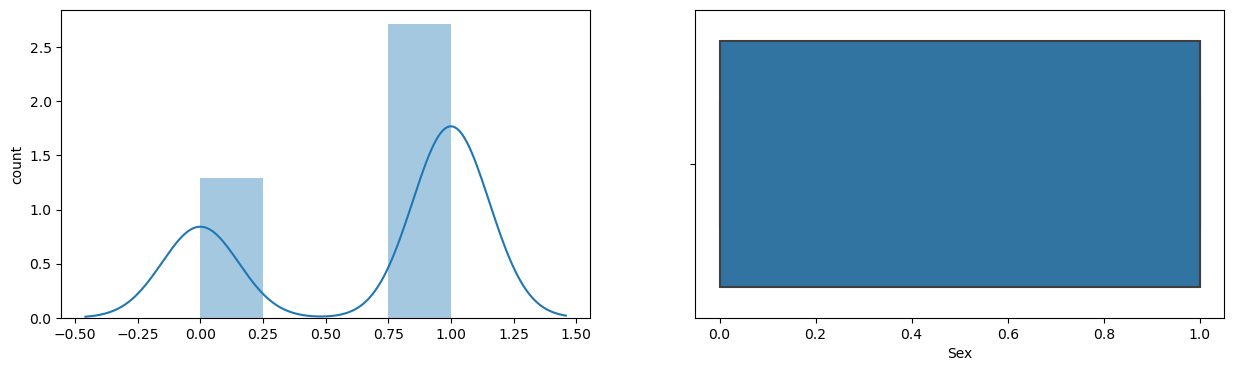

Chest pain type
Skew : -0.88


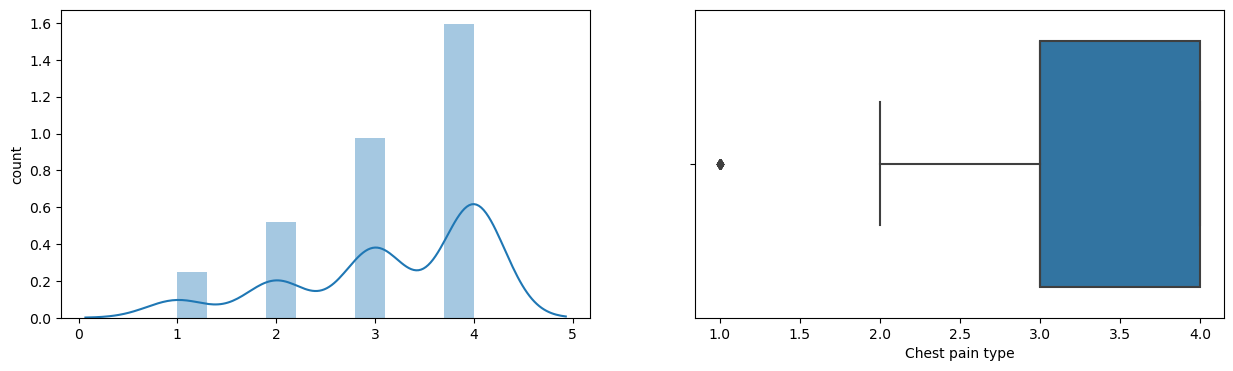

BP
Skew : 0.72


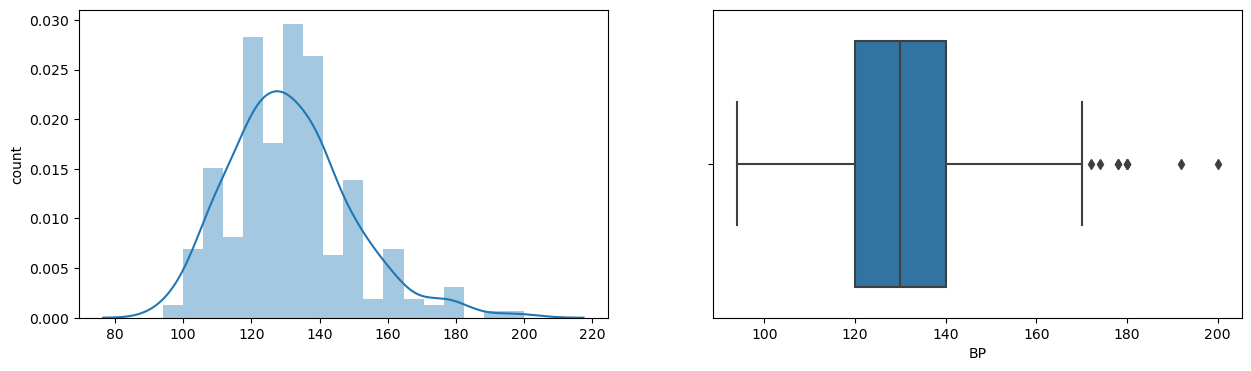

Cholesterol
Skew : 1.18


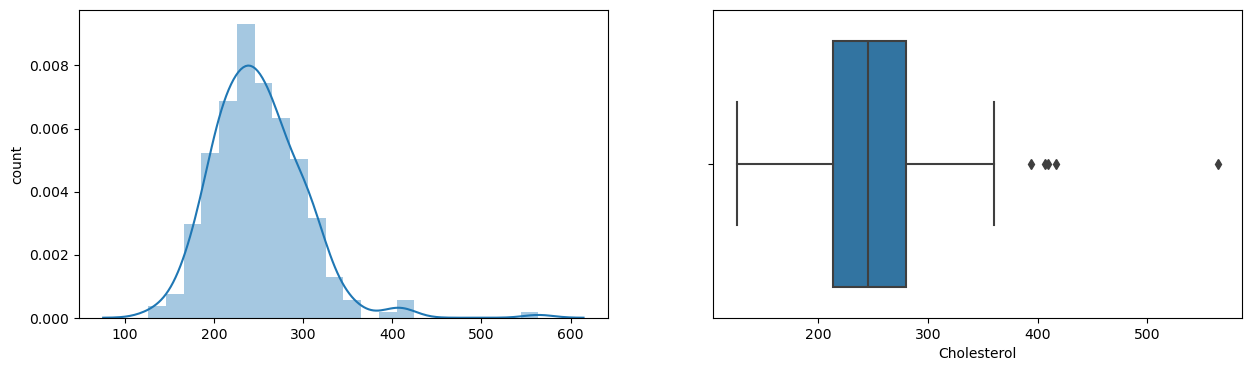

FBS over 120
Skew : 1.99


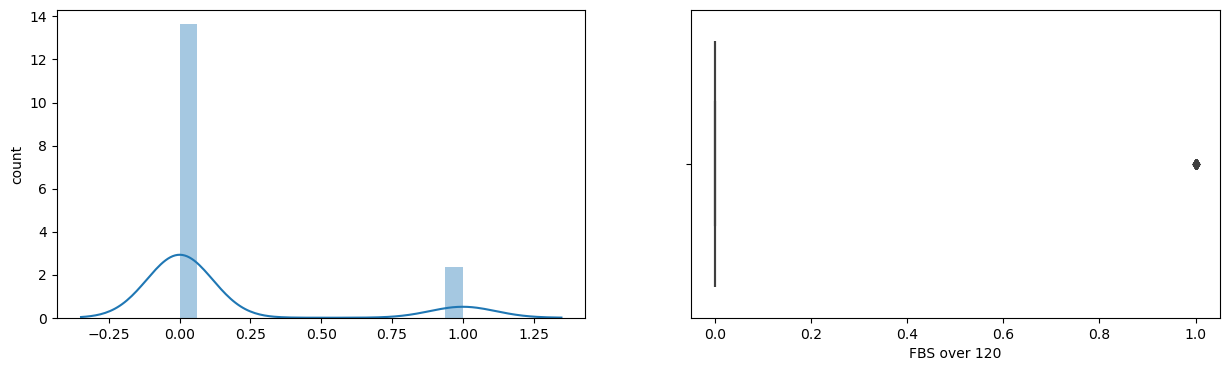

EKG results
Skew : -0.04


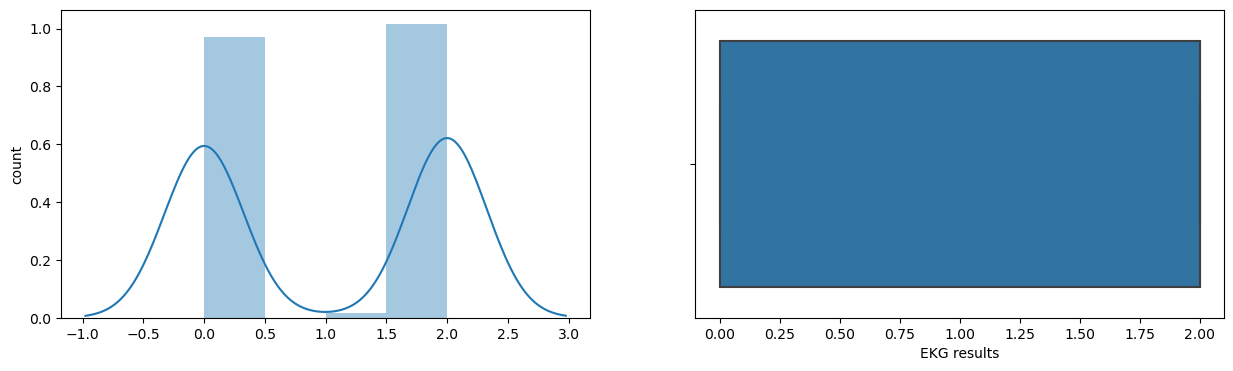

Max HR
Skew : -0.53


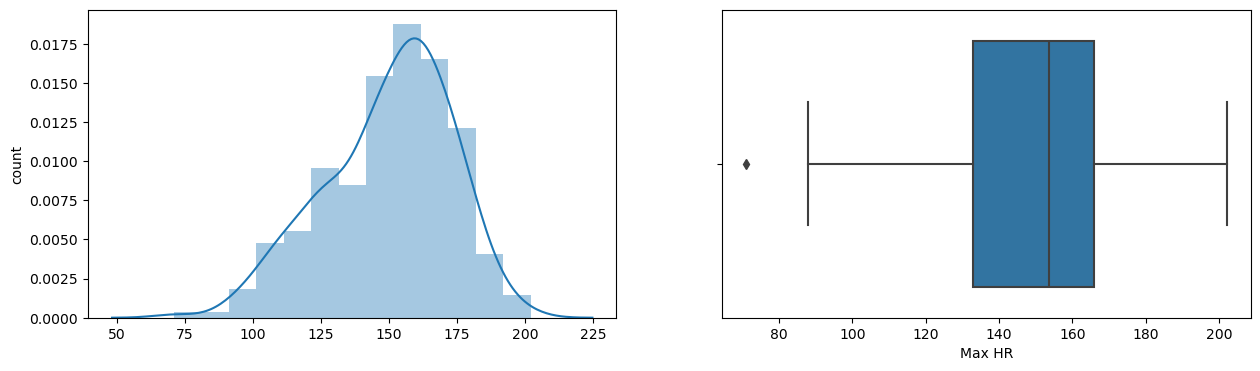

Exercise angina
Skew : 0.73


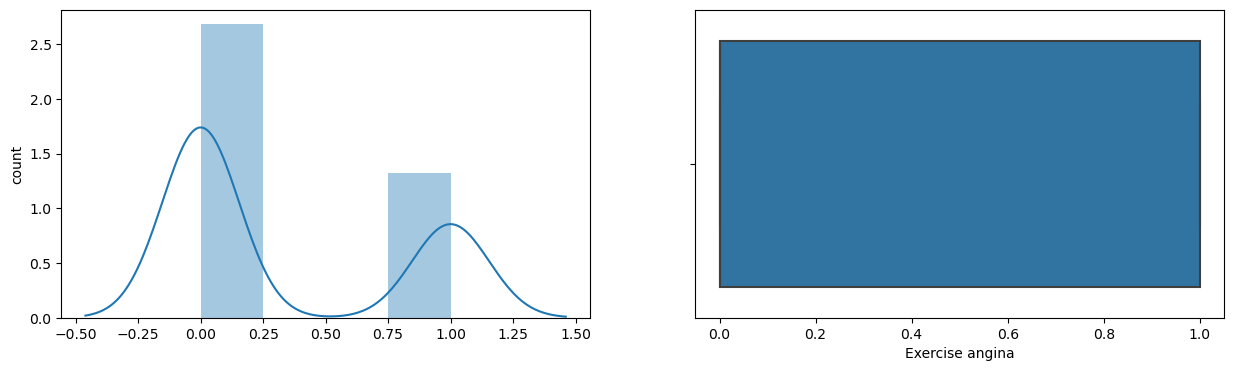

ST depression
Skew : 1.26


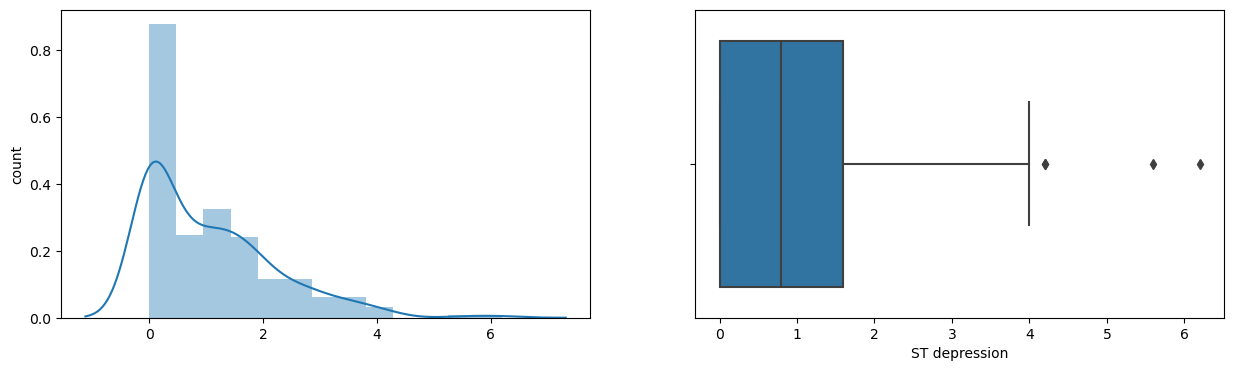

Slope of ST
Skew : 0.54


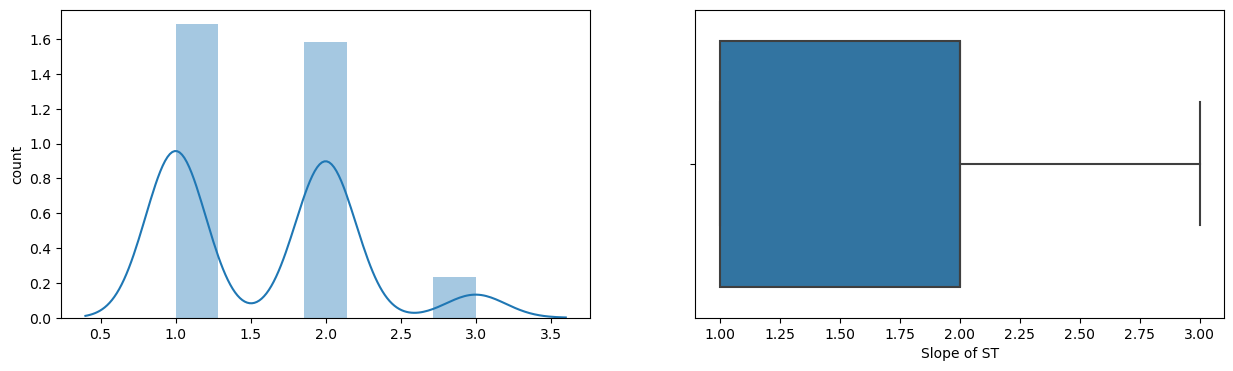

Number of vessels fluro
Skew : 1.21


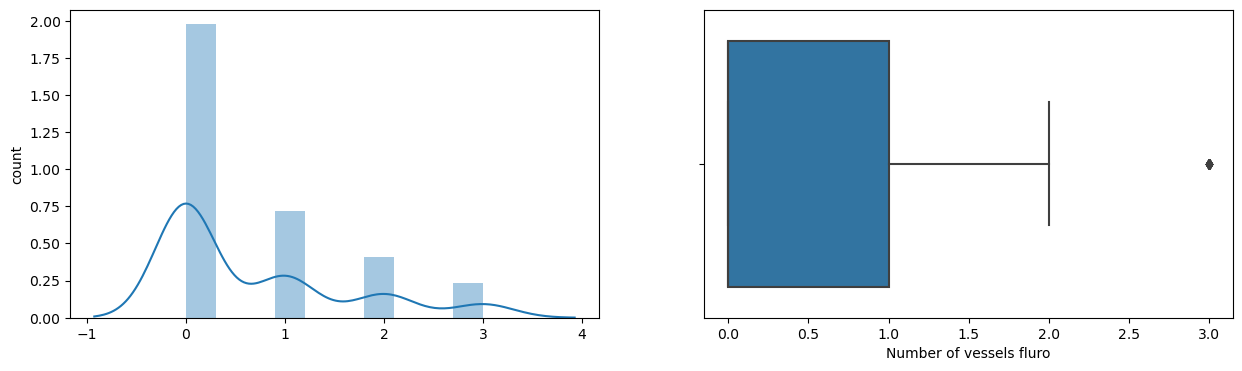

Thallium
Skew : 0.29


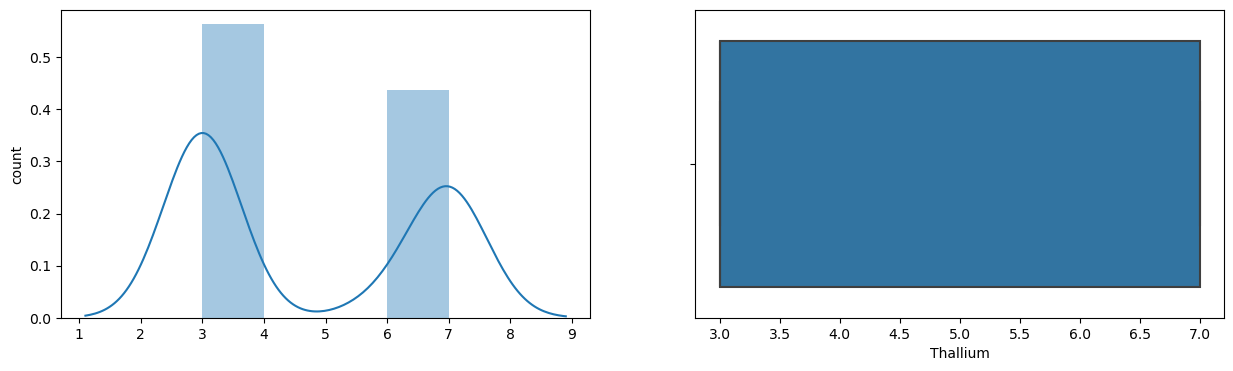

In [9]:
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(x = df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

## Outlier Analysis

If there will be any outlier on mention column then we have to use  Percentile Distribution on Sex, Chest Pain Type, FBS over 120, EKG Results,Exercise angina, Slope of ST, Number of vessels fluro and Thallium.

Beside this, we have to apply Skewed Distribution on ST depression, Cholestrol, BP

And, Normal Distribution used on Max HR, Age

## Remove Outlier

In [10]:
## Skewed

q1 = df[['BP','Cholesterol','ST depression']].quantile(0.25)
q2 = df[['BP','Cholesterol','ST depression']].quantile(0.75)

IQR = q2 - q1
lb = q1 - IQR*1.5
ub = q2 + IQR*1.5

print("lower bound:",lb)
print("upper bound:",ub)

lower bound: BP                90.0
Cholesterol      112.5
ST depression     -2.4
dtype: float64
upper bound: BP               170.0
Cholesterol      380.5
ST depression      4.0
dtype: float64


In [11]:
df = df.copy()
df[['BP','Cholesterol','ST depression']] = np.where(df[['BP','Cholesterol','ST depression']] > ub,
                                ub,
                                np.where(df[['BP','Cholesterol','ST depression']] < lb,
                                         lb,
                                         df[['BP','Cholesterol','ST depression']]
                                        ))

BP
Skew : 0.37


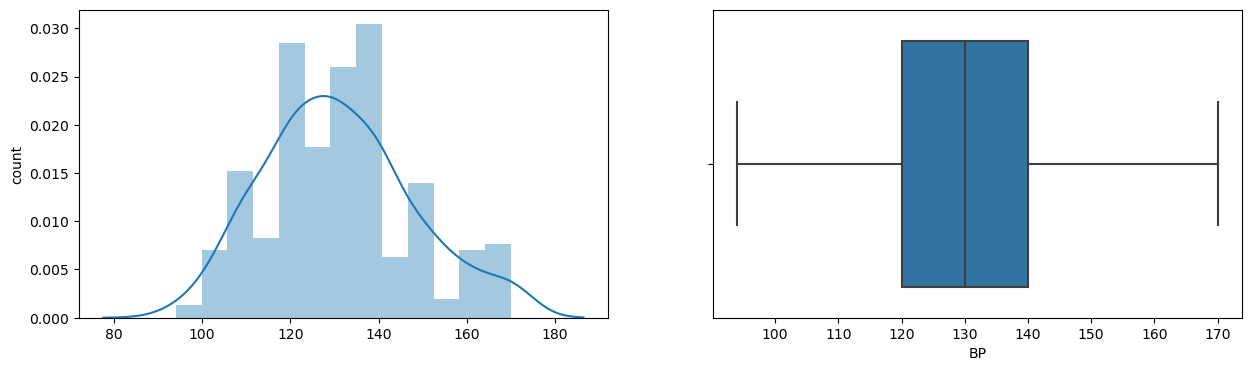

Cholesterol
Skew : 0.35


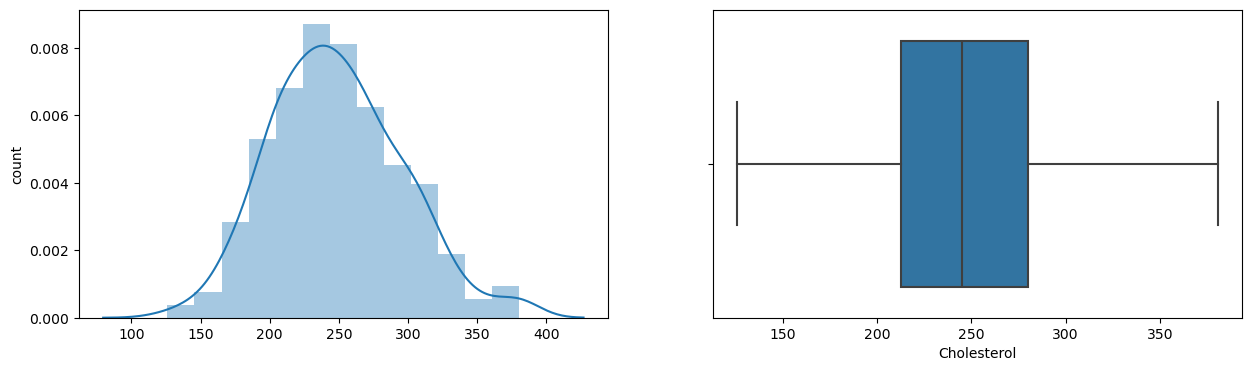

ST depression
Skew : 0.95


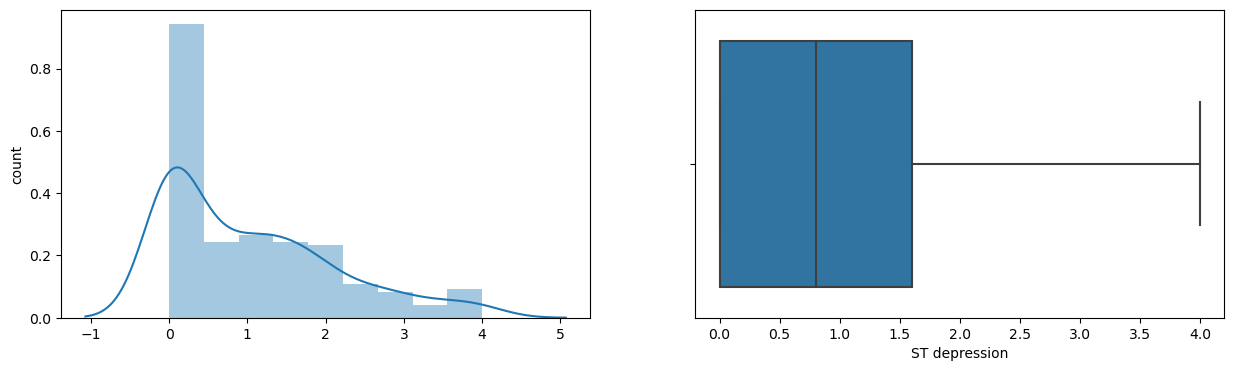

In [12]:
X = df[['BP','Cholesterol','ST depression']]
for col in X :
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(x = df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [13]:
## Normal Distribution

print("Highest allowed",df[['Max HR','Age']].mean() + 3*df[['Max HR','Age']].std())
print("Lowest allowed",df[['Max HR','Age']].mean() - 3*df[['Max HR','Age']].std())

Highest allowed Max HR    219.174928
Age        81.760533
dtype: float64
Lowest allowed Max HR    80.180627
Age       27.106134
dtype: float64


In [14]:
## Find the outlier  by using zscore method
df[['Max HR','Age']] = (df[['Max HR','Age']] - df[['Max HR','Age']].mean())/df[['Max HR','Age']].std() 
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.708920,1,4,130.0,322.0,0,2,-1.755947,0,2.4,2,3,3,Presence
1,1.379578,0,3,115.0,380.5,0,2,0.445582,0,1.6,2,0,7,Absence
2,0.281771,1,2,124.0,261.0,0,0,-0.374596,0,0.3,1,0,7,Presence
3,1.050236,1,4,128.0,263.0,0,0,-1.928616,1,0.2,2,1,7,Absence
4,2.148043,0,2,120.0,269.0,0,2,-1.237940,1,0.2,1,1,3,Absence


In [15]:
## Capping

ul = df[['Max HR','Age']].mean() + 3*df[['Max HR','Age']].std()
ll = df[['Max HR','Age']].mean() - 3*df[['Max HR','Age']].std()

df[['Max HR','Age']] = np.where( df[['Max HR','Age']] > ul,
                                  ul,
                                  np.where(df[['Max HR','Age']] < ll,
                                           ll,
                                           df[['Max HR','Age']]))

Max HR
Skew : -0.49


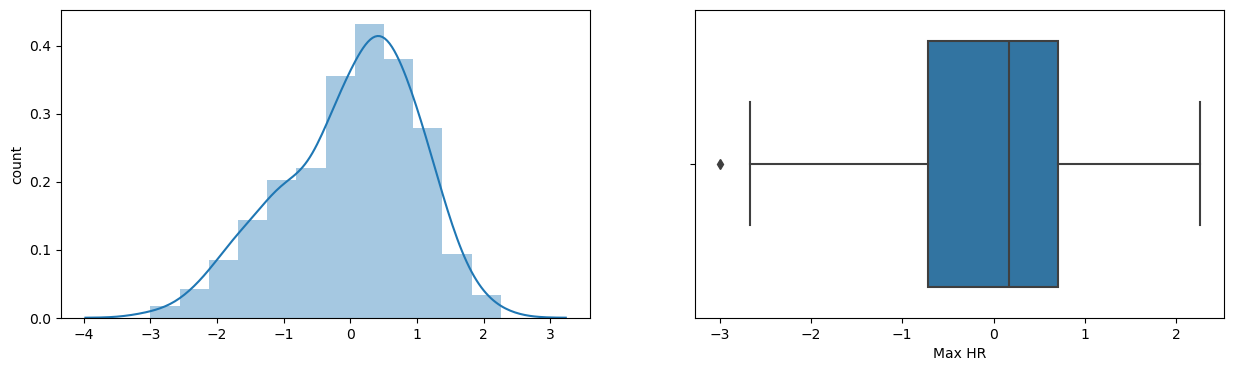

Age
Skew : -0.16


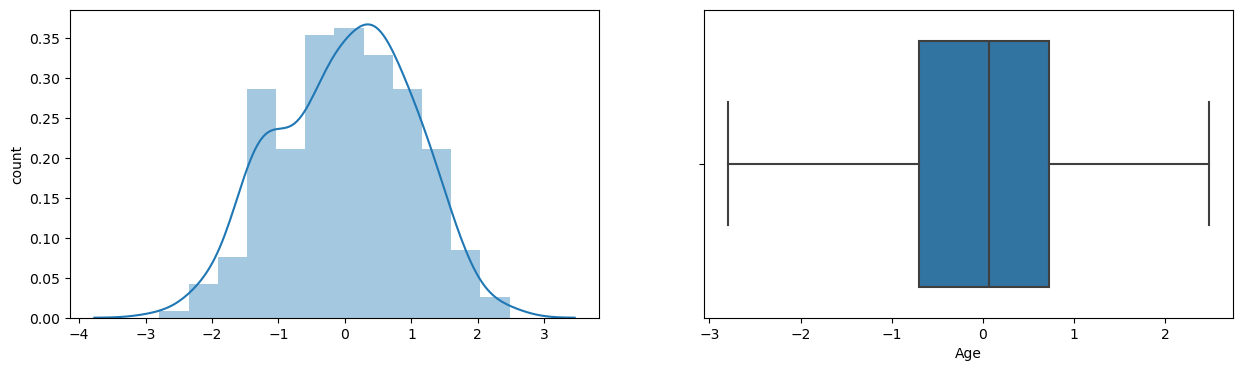

In [16]:
Y = df[['Max HR','Age']]
for col in Y :
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(x = df[col])
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

<Figure size 1300x1700 with 0 Axes>

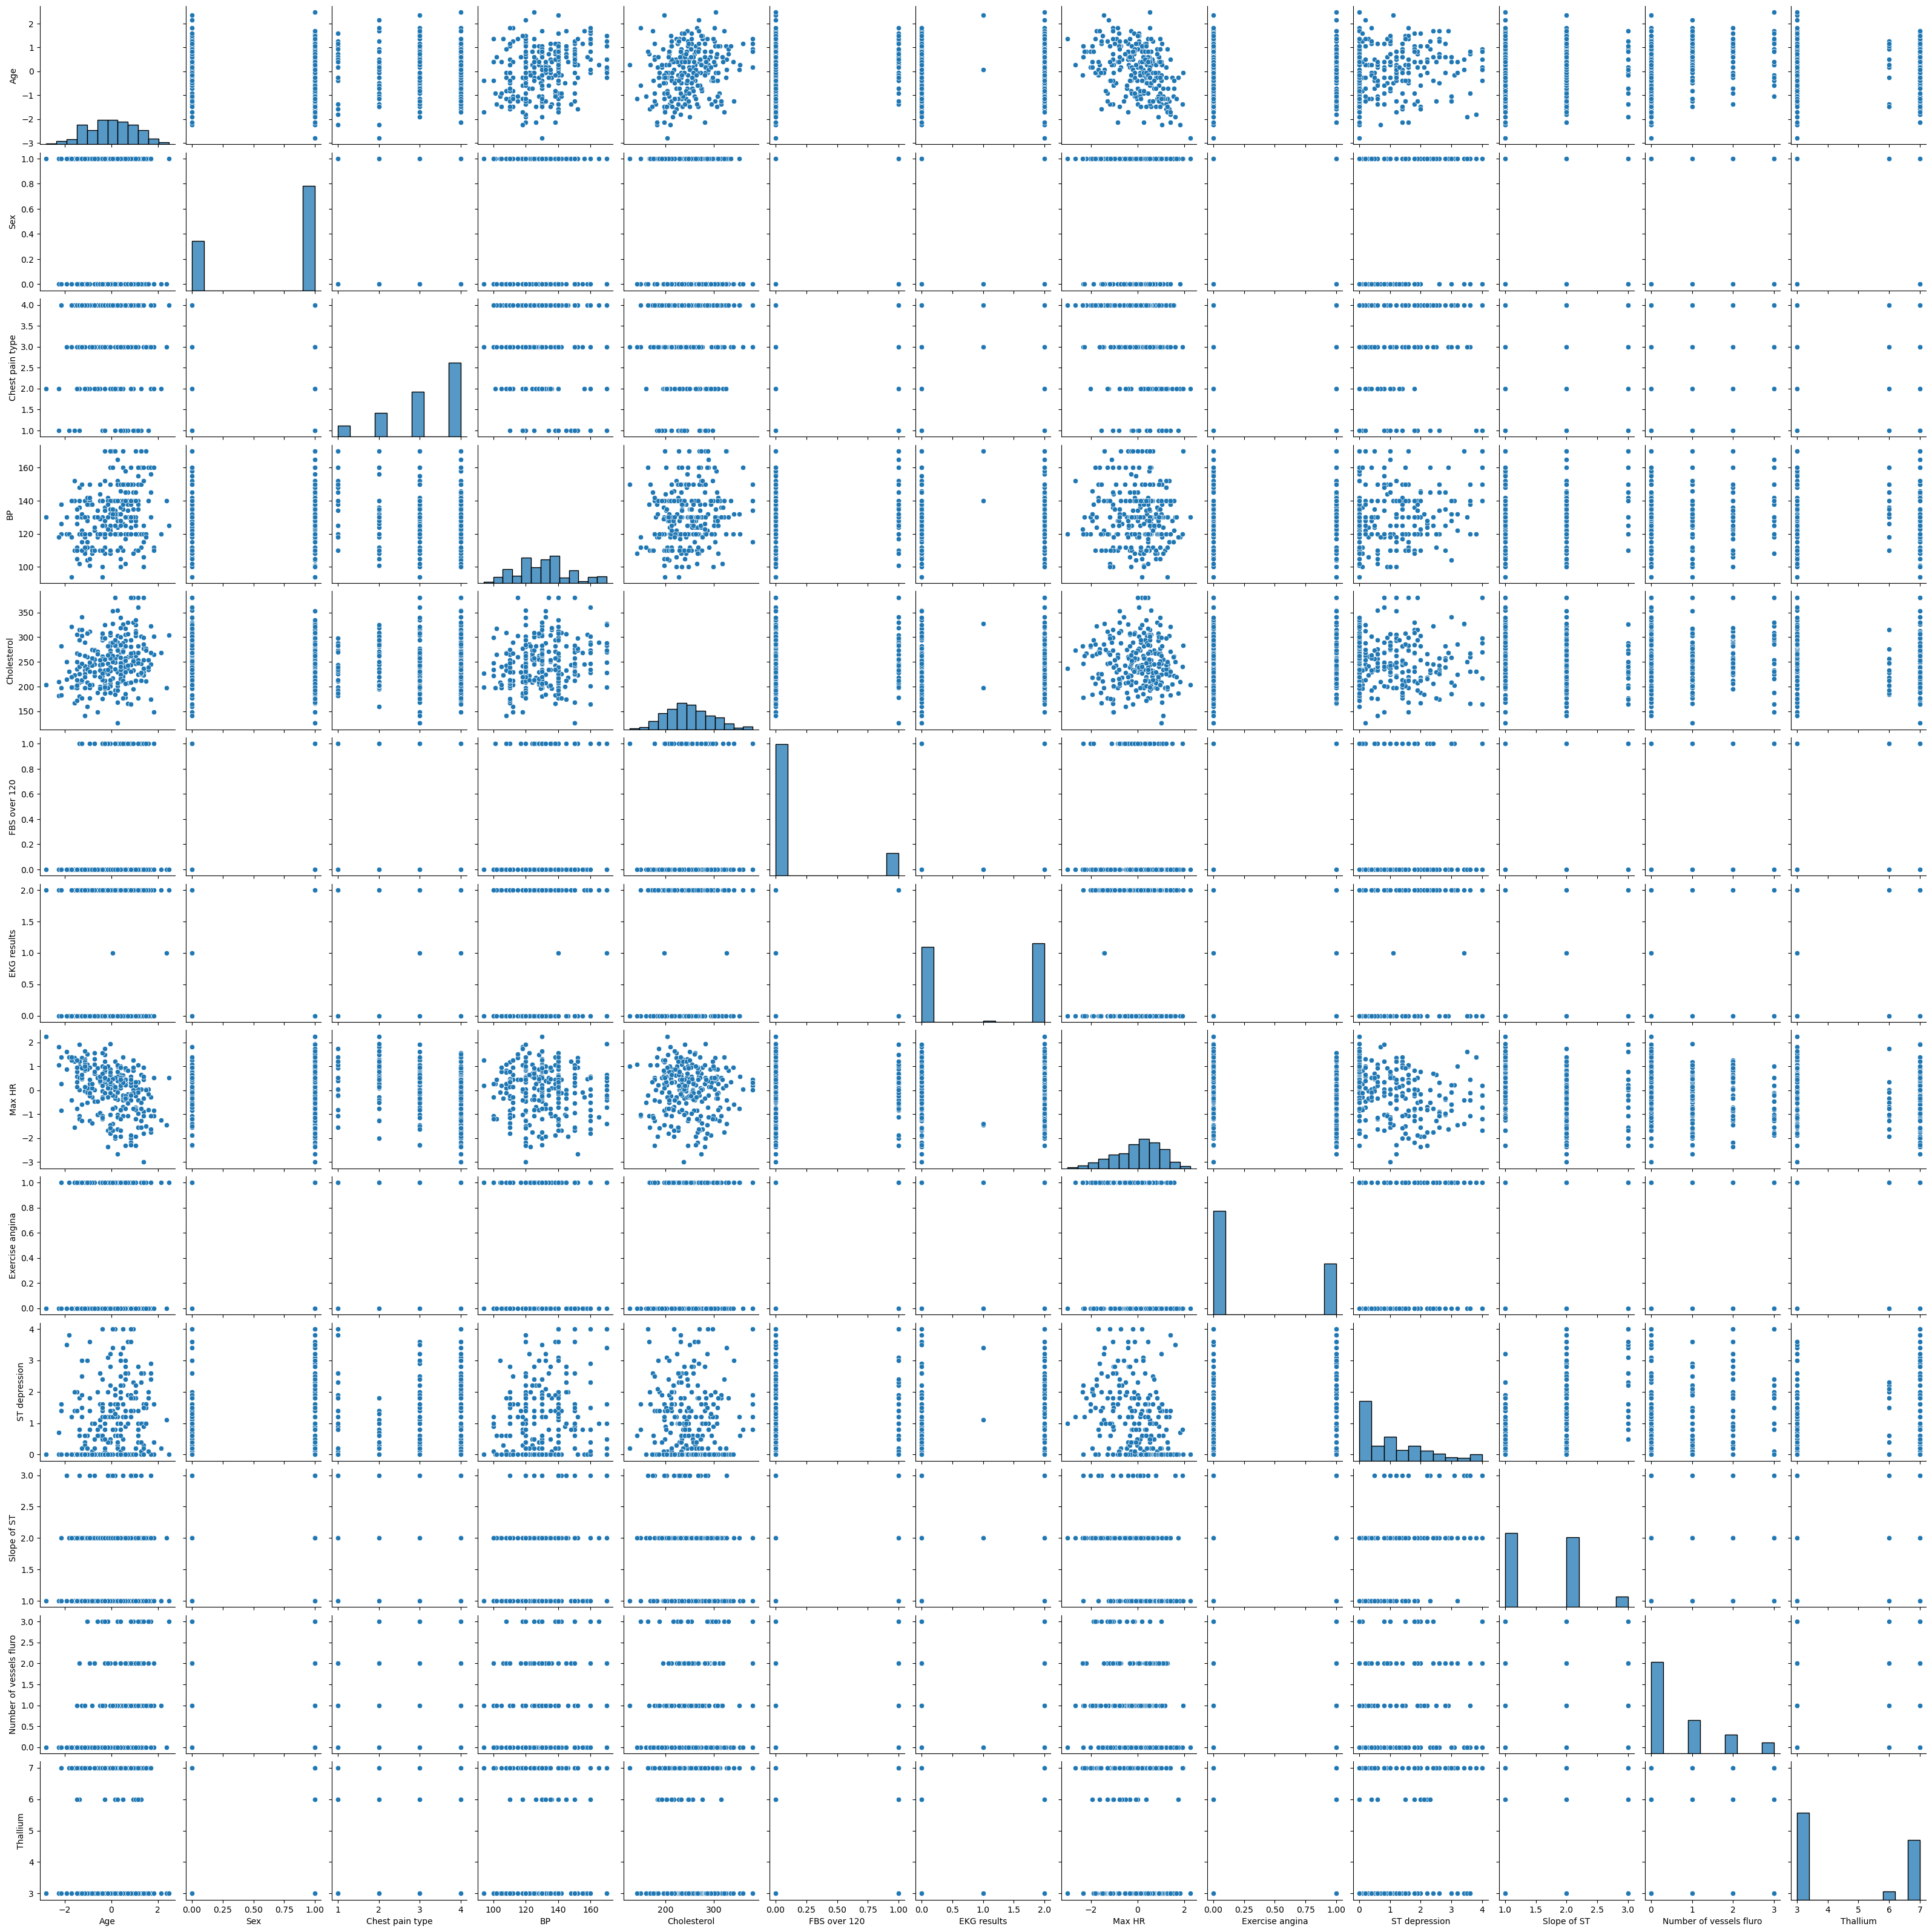

In [17]:
plt.figure(figsize=(13,17))
sns.pairplot(df)
plt.show()

## Part 3 

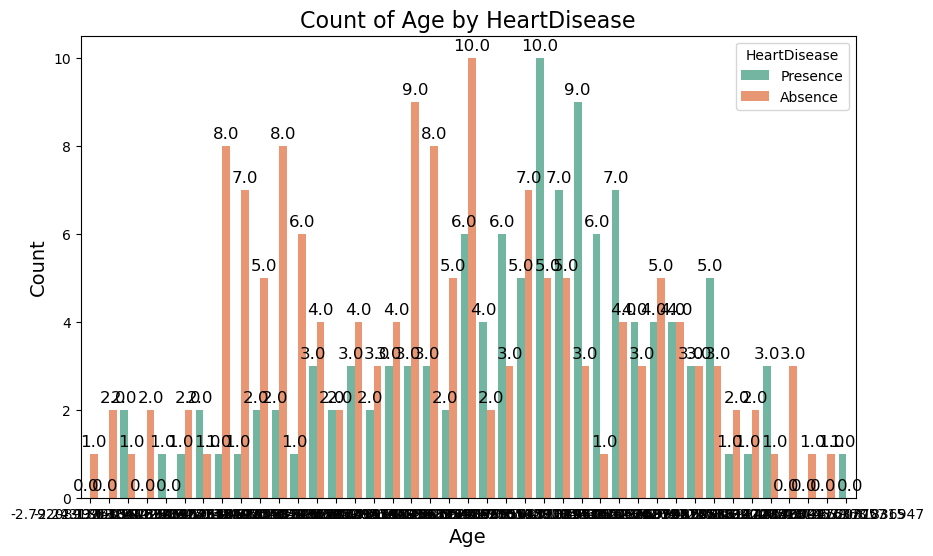

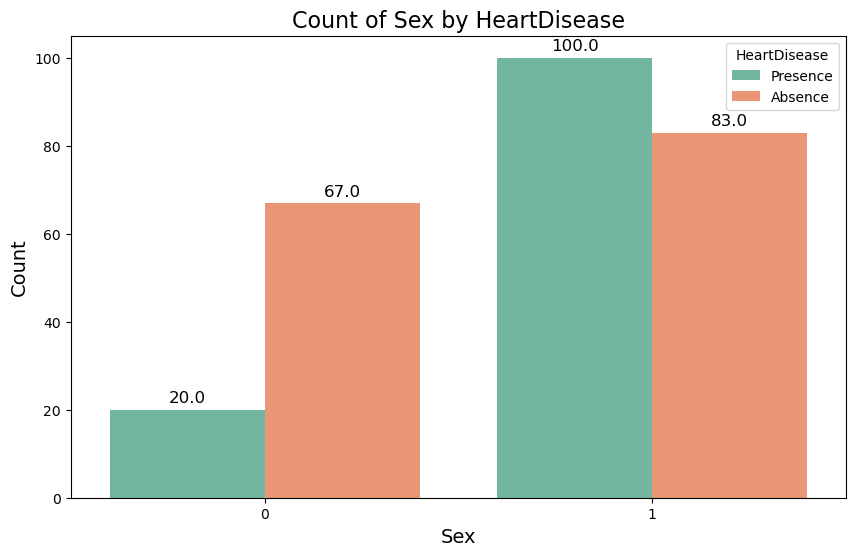

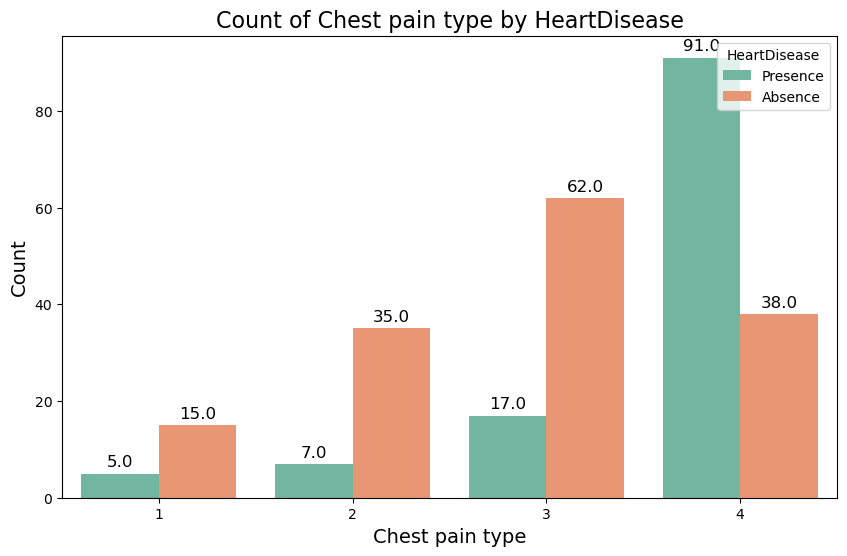

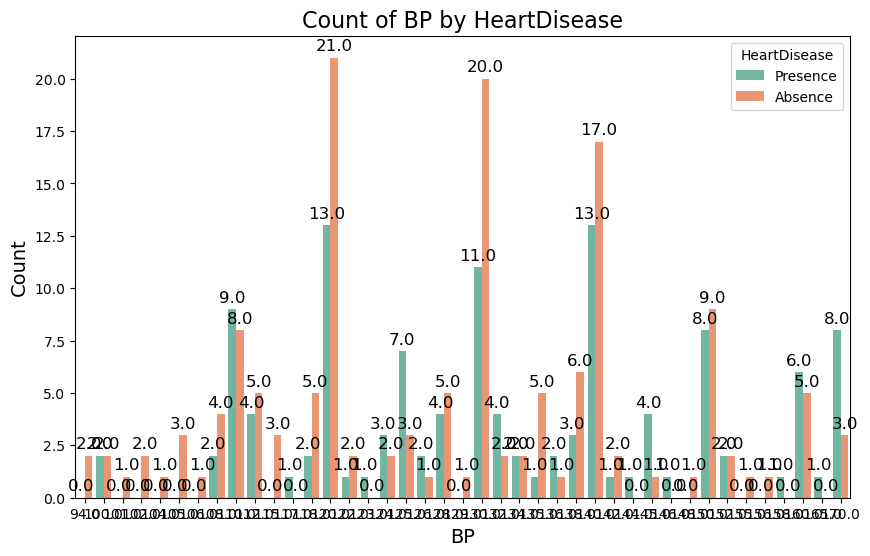

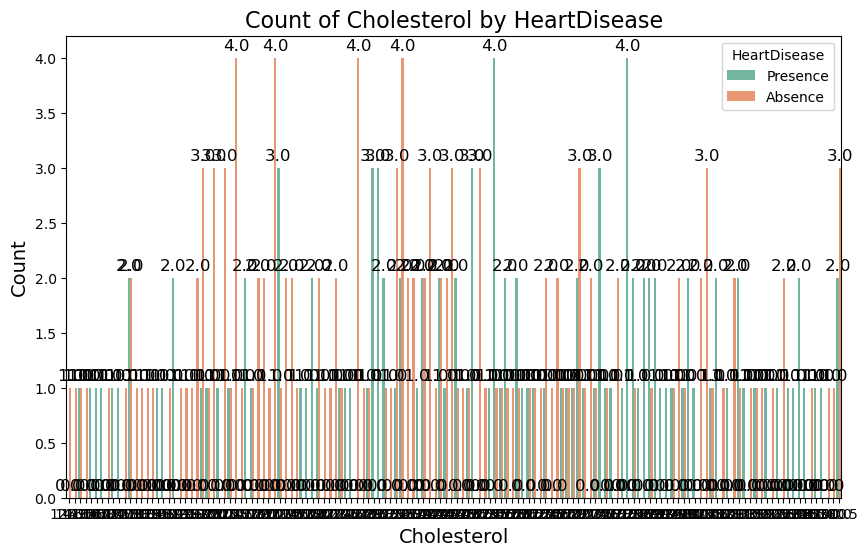

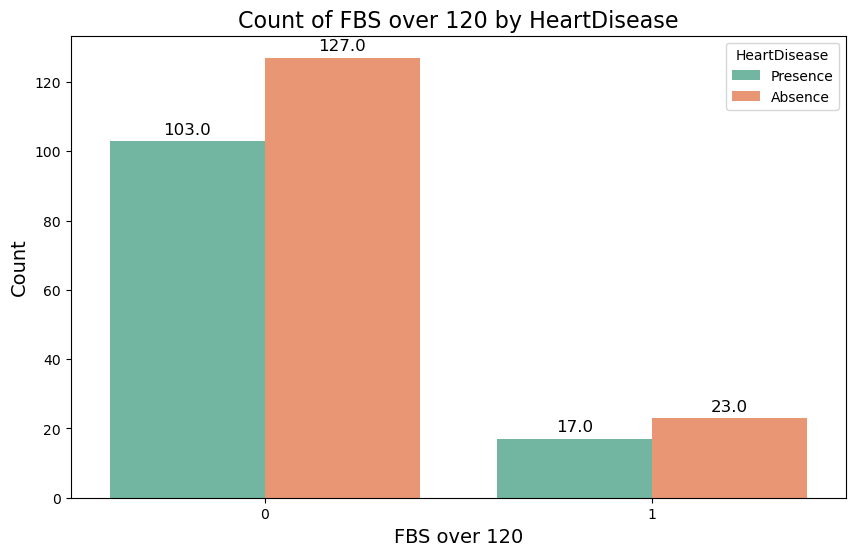

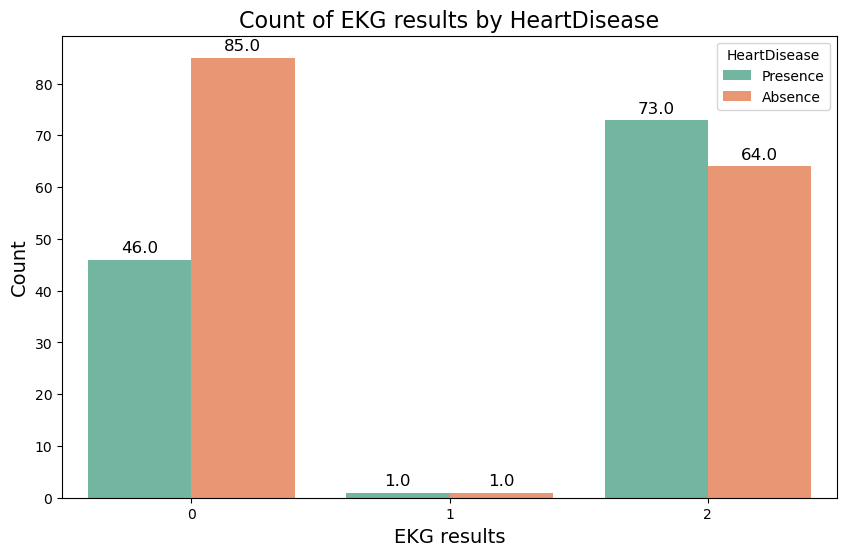

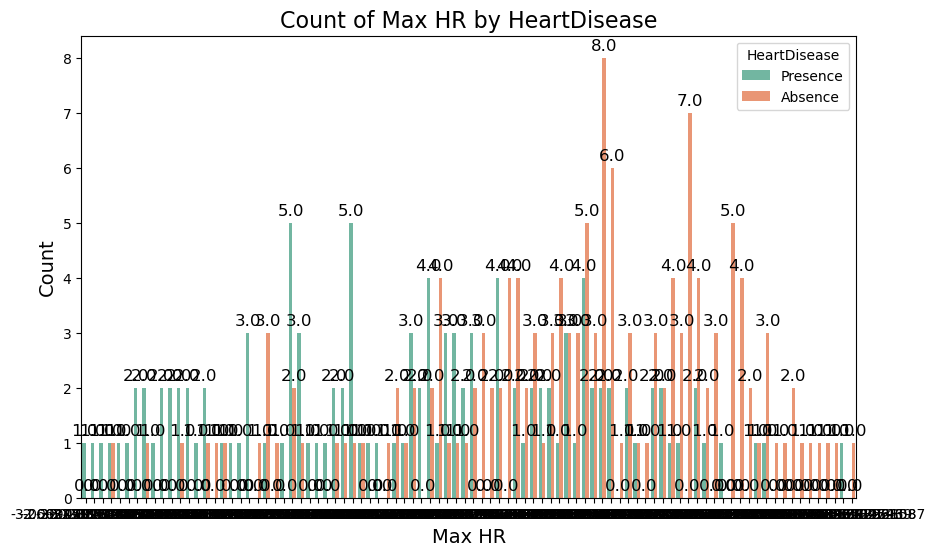

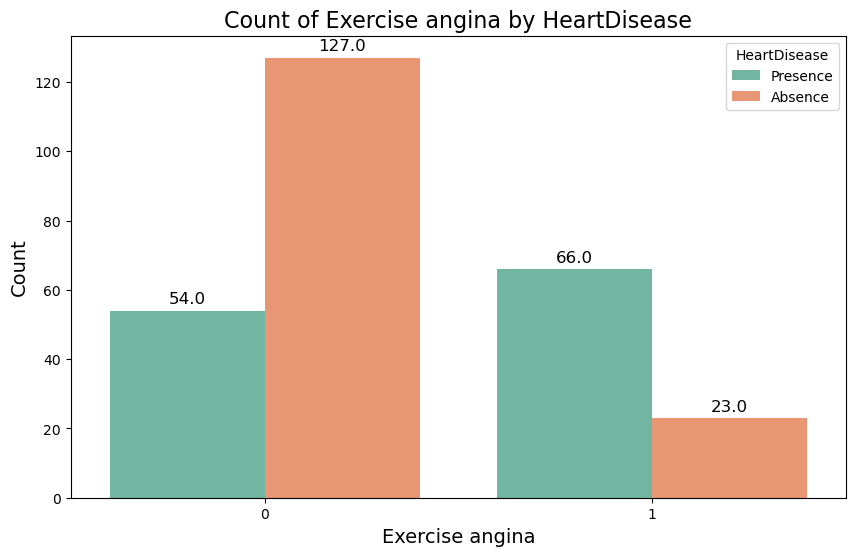

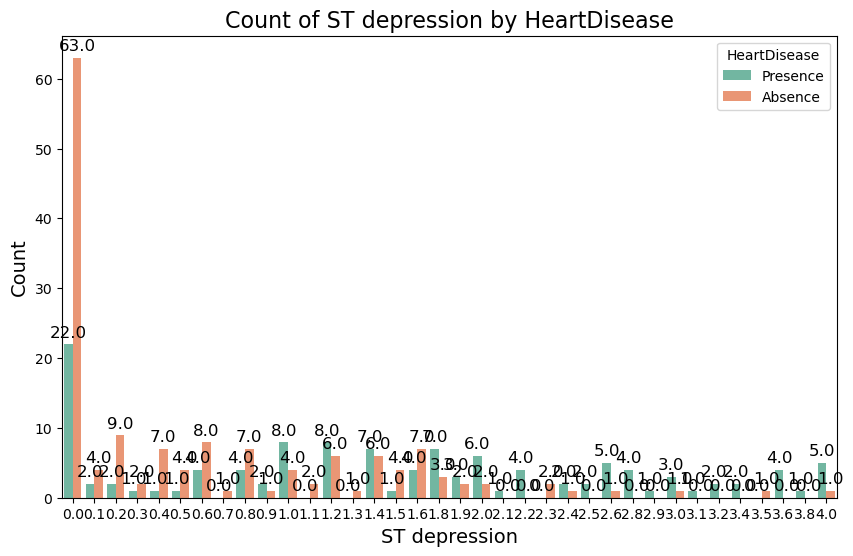

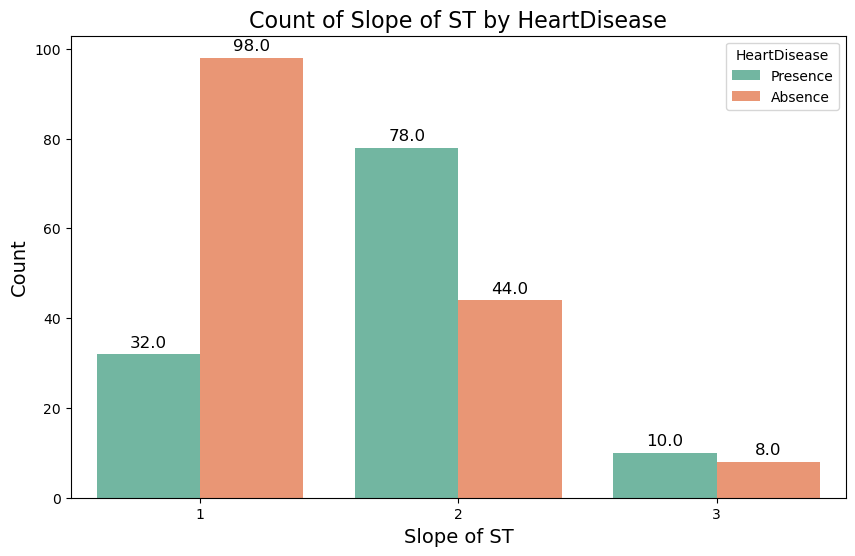

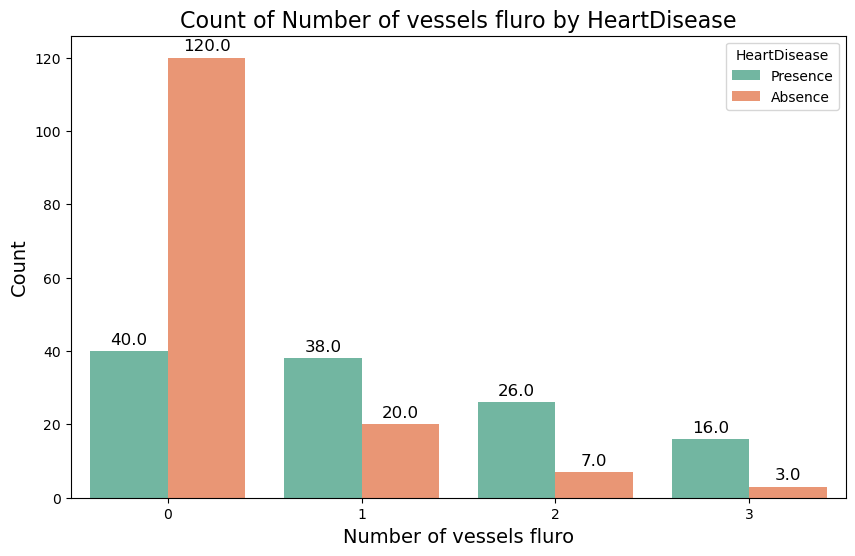

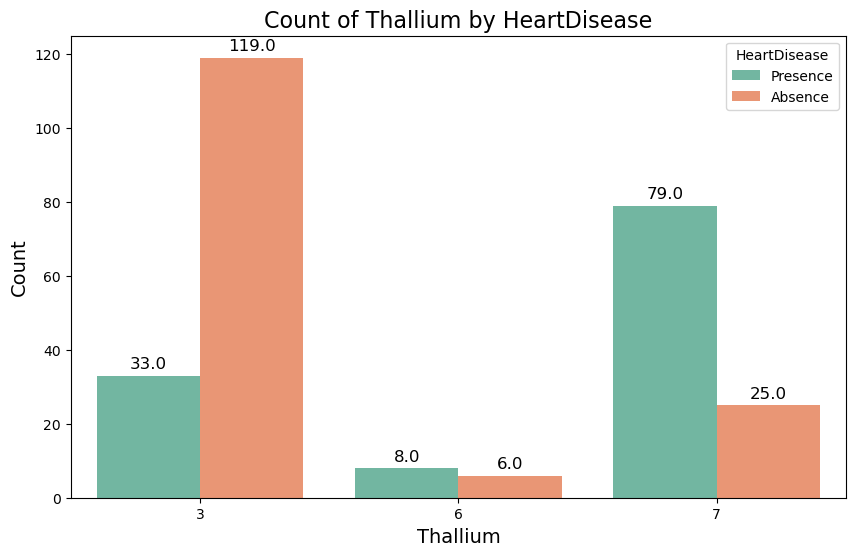

In [18]:
for column in num_cols:
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=df, x=column, hue='Heart Disease', palette='Set2')
    
    # Add data labels
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5), 
                    textcoords='offset points')

    # Add title and labels
    plt.title(f'Count of {column} by HeartDisease', fontsize=16)
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='HeartDisease', loc='upper right')
    
    # Show the plot
    plt.show()

## Part 4

In [25]:
restingbp_zero_count = (df['BP'] == 140).sum()
restingbp_zero_count

30

In [24]:
choles_count = (df['Cholesterol'] == 240).sum()
choles_count

3

## Part 5

In [21]:
# Convert the AgeGroup column into dummy variables
df_dummies = pd.get_dummies(df, columns=['Age'], drop_first=False)
print(df_dummies.head())

df_dummies1 = pd.get_dummies(df, columns=['Sex'], drop_first=False)
print(df_dummies1.head())

df_dummies4 = pd.get_dummies(df, columns=['FBS over 120'], drop_first=False)
print(df_dummies4.head())

   Sex  Chest pain type     BP  Cholesterol  FBS over 120  EKG results  \
0    1                4  130.0        322.0             0            2   
1    0                3  115.0        380.5             0            2   
2    1                2  124.0        261.0             0            0   
3    1                4  128.0        263.0             0            0   
4    0                2  120.0        269.0             0            2   

     Max HR  Exercise angina  ST depression  Slope of ST  ...  \
0 -1.755947                0            2.4            2  ...   
1  0.445582                0            1.6            2  ...   
2 -0.374596                0            0.3            1  ...   
3 -1.928616                1            0.2            2  ...   
4 -1.237940                1            0.2            1  ...   

   Age_1.160016412103739  Age_1.269797145110402 Age_1.379577878117065  \
0                  False                  False                 False   
1                 

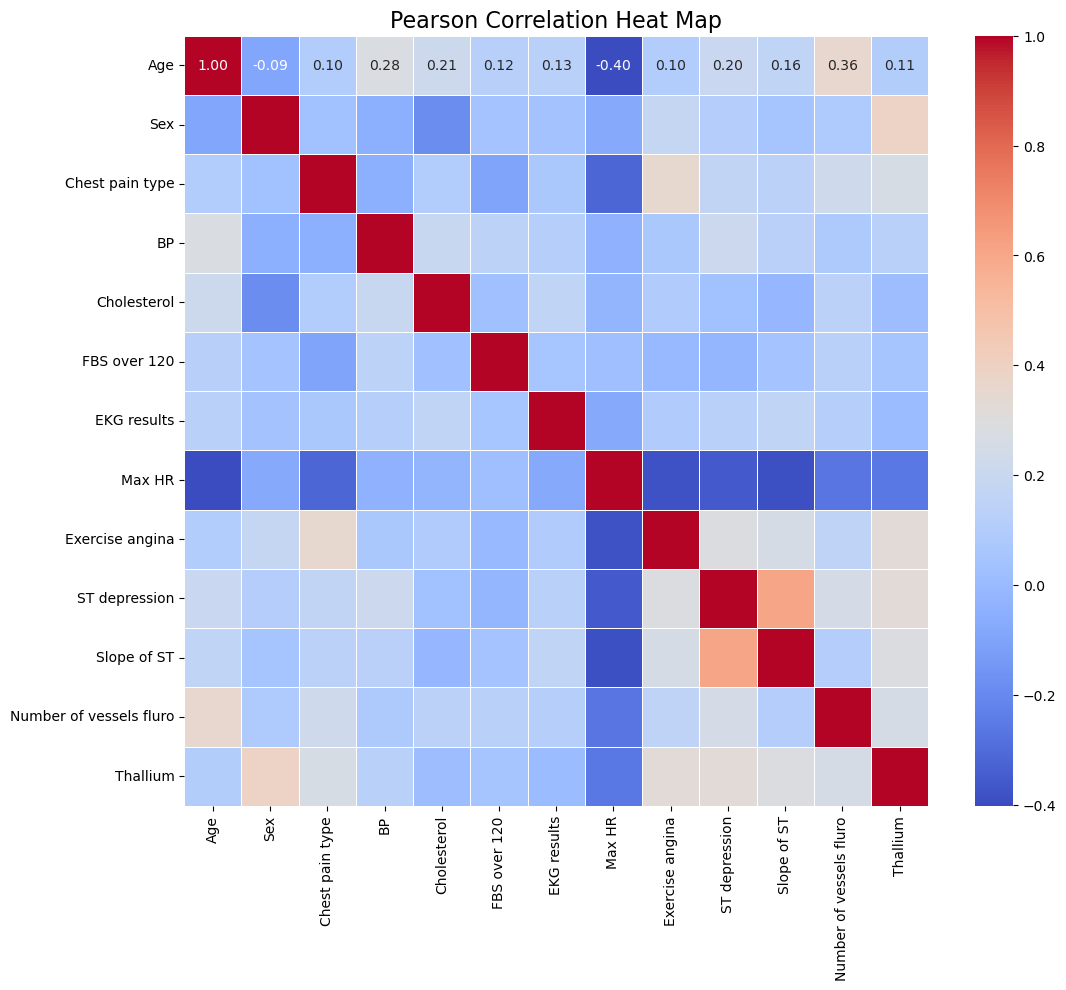

In [22]:
df1 = df.select_dtypes(include = "number")

plt.figure(figsize=(12, 10))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Pearson Correlation Heat Map', fontsize=16)
plt.show()

## Step 6

In [25]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
le = LabelEncoder()
df['Heart Disease'] = le.fit_transform(df['Heart Disease'])
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.708920,1,4,130.0,322.0,0,2,-1.755947,0,2.4,2,3,3,1
1,1.379578,0,3,115.0,380.5,0,2,0.445582,0,1.6,2,0,7,0
2,0.281771,1,2,124.0,261.0,0,0,-0.374596,0,0.3,1,0,7,1
3,1.050236,1,4,128.0,263.0,0,0,-1.928616,1,0.2,2,1,7,0
4,2.148043,0,2,120.0,269.0,0,2,-1.237940,1,0.2,1,1,3,0


In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [27]:
x = df.drop(columns = 'Heart Disease')
y = df['Heart Disease']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [29]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2) 
# metric='minkowski': This is the default parameter and it decides the distance between the points
# p=2: It is equivalent to the standard Euclidean metric.
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = knn.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [33]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.8518518518518519
Confusion Matrix:
[[28  5]
 [ 3 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.78      0.86      0.82        21

    accuracy                           0.85        54
   macro avg       0.84      0.85      0.85        54
weighted avg       0.86      0.85      0.85        54



## Do all this again by using GridSearch

In [34]:
x = df.drop(columns = 'Heart Disease')
y = df['Heart Disease']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [36]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
## Create a Dictionary for Hyperparameter Tuning
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],   # Number of neighbors
                'weights': ['uniform', 'distance'], # Weight function
                    'p': [1, 2] }

In [38]:
knn = KNeighborsClassifier()

In [39]:
# Create the GridSearchCV instance
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)


In [40]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [41]:
print(f"Best accuracy score: {grid_search.best_score_:.4f}")
print("Best parameters:", grid_search.best_params_)

Best accuracy score: 0.8149
Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}


## Markdown Summary

### Model Accuracy and Best Parameters

The grid search was conducted to find the optimal parameters for the k-Nearest Neighbors (k-NN) classifier. 

- **Best Accuracy Score**: The best accuracy score obtained was 0.851 but from the grid search it was 0.8149. The accuracy score of testing data was 0.9273 by grid search. 
  
- **Best Parameters**: The optimal parameters found are:
  - `n_neighbors`: Y (number of neighbors)
  - `weights`: Z (weight function, either 'uniform' or 'distance')
  - `p`: W (power parameter for the Minkowski distance)

These parameters produced the best accuracy score. Comparing this to previous models or attempts, the grid search has potentially improved model performance by systematically tuning the hyperparameters.

This approach ensures that the k-NN model is optimized for accuracy based on the given parameter grid. Further experimentation with different parameters or additional preprocessing steps could be considered for even better performance.


In [90]:
grid_search.fit(X_test,y_test)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [91]:
print(f"Best accuracy score: {grid_search.best_score_:.4f}")
print("Best parameters:", grid_search.best_params_)

Best accuracy score: 0.9273
Best parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
